In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns",101)
pd.set_option("display.max_rows",1400)

In [125]:
df = pd.read_csv('train_test_merged.csv',index_col=0)

In [126]:
df.shape

(2919, 80)

In [127]:
df.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [ ]:
df.info().astype(object)

AttributeError: Unknown property bins

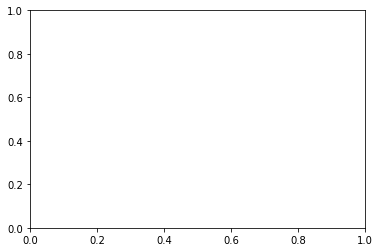

In [226]:
index = np.arange(len(df['SalePrice']))
plt.bar(index,df['SalePrice'],bins=40)

In [129]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageYrBlt       159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Utilities           2
Functional          2
BsmtFullBath        2
BsmtHalfBath        2
GarageCars          1
BsmtFinSF2          1
Exterior2nd         1
GarageArea          1
TotalBsmtSF         1
BsmtUnfSF           1
BsmtFinSF1          1
Exterior1st         1
KitchenQual         1
SaleType            1
Electrical          1
LandContour         0
LotShape            0
Street              0
LotArea             0
YearRemodAdd        0
RoofMatl            0
RoofStyle           0
YearBuilt           0
OverallCond         0
OverallQual         0
HouseStyle

In [130]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [131]:
df.isnull().sum().sort_values(ascending=False)

SalePrice        1459
LotFrontage       486
GarageCond        159
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Utilities           2
Functional          2
BsmtFullBath        2
BsmtHalfBath        2
BsmtFinSF1          1
BsmtFinSF2          1
Exterior2nd         1
GarageArea          1
TotalBsmtSF         1
BsmtUnfSF           1
Electrical          1
Exterior1st         1
KitchenQual         1
SaleType            1
GarageCars          1
LotShape            0
Street              0
LotArea             0
LandContour         0
Neighborhood        0
YearRemodAdd        0
RoofMatl            0
RoofStyle           0
YearBuilt           0
OverallCond         0
OverallQual         0
HouseStyle          0
ExterQual           0
Condition2          0
Condition1          0
LotConfig 

In [132]:
df['LotFrontage'] = df['LotFrontage'].fillna((df['LotFrontage'].mean()))

In [100]:
df.shape

(2919, 75)

In [135]:
df1 = pd.get_dummies(df)

In [142]:
# Since Saleprice(target variable) column changed from last column to column38, we shall get it back to last column
df_sale = df1['SalePrice']
df1.drop(['SalePrice'],axis=1,inplace=True)

KeyError: 'SalePrice'

In [147]:
frames=[df1,df_sale]
df=pd.concat(frames,axis=1)
df.head(4)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,208500.0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,181500.0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,223500.0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,140000.0


In [148]:
df_train = df.iloc[:1460,:]
df_test = df.iloc[1460:,:-1]

In [149]:
df_train.dropna(how='any',inplace=True)
df_test.dropna(how='any',inplace=True)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
df_train.head(4)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,208500.0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,181500.0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,223500.0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,140000.0


In [193]:
X = df_train.iloc[:,:-1]
y = df_train['SalePrice']
FinalX_test = df_test # MASTER TEST DATA

In [188]:
FinalX_test.shape

(1365, 270)

In [191]:
X.shape

(1371, 270)

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [168]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [198]:
print(X_train.shape)
print(y_train.shape)

(1096, 270)
(1096,)


In [199]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [200]:
y_pred = reg.predict(X_train)

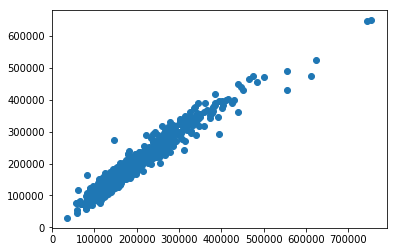

In [206]:
plt.scatter(y_train,y_pred)

In [207]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [208]:
print('MSE:',mean_squared_error(y_train,y_pred))
print('MAE:',mean_absolute_error(y_train,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_pred)))

('MSE:', 345308766.01015913)
('MAE:', 12666.029748057053)
('RMSE:', 18582.485463741366)


In [204]:
y_test = reg.predict(FinalX_test)

In [205]:
print('MSE:',mean_squared_error(y_train,FinalX_test))
# print('MAE:',mean_absolute_error(y_train,y_pred))
# print('RMSE:',np.sqrt(mean_squared_error(y_train,y_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [1096, 1365]

In [210]:
18582.0/180921.0

0.10270781169681795

In [211]:
df_plot = pd.DataFrame({'Actual': y_pred, 'Predicted': y_train}) 

In [215]:
df_plot.head(400)

,Actual,Predicted
Id,,
692,649708.999181,755000.0
151,147917.208988,122000.0
571,131409.198902,142600.0
329,176278.714752,214500.0
440,114406.871589,110000.0
607,143414.208864,152000.0
1278,194695.174949,197900.0
1242,244631.603365,248328.0
200,315520.650701,274900.0


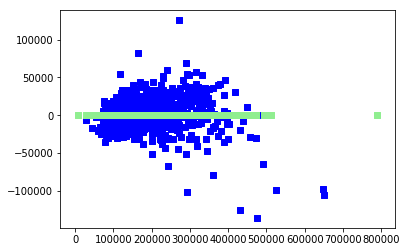

In [218]:
plt.scatter(y_pred, y_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")